## IPL Win Probability (2008-2024)

In [1232]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [1233]:
#Load dataset
pd.set_option("display.max_columns", None)                                     # Display all columns with none limit
matches = pd.read_csv(r'C:\Users\abhi1\Desktop\ipl\notebook\matches.csv')      # r in front of the file path is called a raw string, and it’s used to avoid issues with backslashes (\) being interpreted as escape characters (like \n, \t, etc.).
matches.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan


In [1234]:
delivery = pd.read_csv(r'C:\Users\abhi1\Desktop\ipl\notebook\deliveries.csv')
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,1,SC Ganguly,P Kumar,BB McCullum,0,1,1,legbyes,0,NaN,NaN,NaN
1,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,2,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
2,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,3,BB McCullum,P Kumar,SC Ganguly,0,1,1,wides,0,NaN,NaN,NaN
3,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,4,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN
4,335982,1,Kolkata Knight Riders,Royal Challengers Bangalore,0,5,BB McCullum,P Kumar,SC Ganguly,0,0,0,NaN,0,NaN,NaN,NaN


In [1235]:
matches.shape

(1095, 20)

- Total 1095 matches were played

In [1236]:
delivery.shape

(260920, 17)

here we are calculating total runs by adding total run on eachball of every inning 

In [1237]:
# Lets see total runs in each inning

total_score_df = delivery.groupby(["match_id", "inning"]).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335982,2,82
2,335983,1,240
3,335983,2,207
4,335984,1,129
...,...,...,...
2212,1426310,2,174
2213,1426311,1,175
2214,1426311,2,139
2215,1426312,1,113


- There were a total of 1095 matches, and since each match consists of two innings, the total number of innings is calculated as 1095 × 2 = 2190.

In [1238]:
# Now, we will consider only the first inning of each match. bcoz we are predicting win probability of 2nd inning team
total_score_df = total_score_df[total_score_df['inning'] == 1]
total_score_df = total_score_df.reset_index(drop=True)
total_score_df

,match_id,inning,total_runs
0,335982,1,222
1,335983,1,240
2,335984,1,129
3,335985,1,165
4,335986,1,110
...,...,...,...
1090,1426307,1,214
1091,1426309,1,159
1092,1426310,1,172
1093,1426311,1,175


In [1239]:
# now we will merge match and total score df dataframes
# We will merge on match id. INNING is anyhow 1 so we will not consider this column 
match_df = matches.merge(total_score_df[['match_id','total_runs']], left_on = 'id', right_on= 'match_id')
match_df.head()

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
0,335982,2007/08,Bangalore,2008-04-18,League,BB McCullum,M Chinnaswamy Stadium,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,223.0,20.0,N,NaN,Asad Rauf,RE Koertzen,335982,222
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110


In [1240]:
match_df.shape

(1095, 22)

In [1241]:
# NOw lets how many teams are there
match_df.team1.unique()

array(['Royal Challengers Bangalore', 'Kings XI Punjab',
       'Delhi Daredevils', 'Mumbai Indians', 'Kolkata Knight Riders',
       'Rajasthan Royals', 'Deccan Chargers', 'Chennai Super Kings',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Sunrisers Hyderabad',
       'Gujarat Lions', 'Rising Pune Supergiants',
       'Rising Pune Supergiant', 'Delhi Capitals', 'Punjab Kings',
       'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [1242]:
#teams which are playing ipl 2025
teams = [
    'Royal Challengers Bengaluru',
    'Mumbai Indians',
    'Kolkata Knight Riders',
    'Rajasthan Royals',
    'Chennai Super Kings',
    'Sunrisers Hyderabad',
    'Delhi Capitals', 
    'Punjab Kings',
    'Lucknow Super Giants',
    'Gujarat Titans'
    ]

.str is used when you want to apply string operations(.replace(), .lower(), .contains(),etc) to an entire pandas Series (like a column in DataFrame).

you can also replace part of string using .str , without .str u will only be able to replace exact matches


In [1243]:
# replace the team names in the dataset with the current names

match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')

match_df['team1'] = match_df['team1'].str.replace('Kings XI Punjab','Punjab Kings')
match_df['team2'] = match_df['team2'].str.replace('Kings XI Punjab','Punjab Kings')

match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')
match_df['team2'] = match_df['team2'].str.replace('Royal Challengers Bangalore','Royal Challengers Bengaluru')


.isin(teams) -> if each value in the column exists in the list teams

In [1244]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [1245]:
match_df.shape

(853, 22)

In [1246]:
match_df['team1'].unique()

array(['Punjab Kings', 'Delhi Capitals', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Rajasthan Royals', 'Sunrisers Hyderabad',
       'Chennai Super Kings', 'Lucknow Super Giants', 'Gujarat Titans',
       'Royal Challengers Bengaluru'], dtype=object)

In [1247]:
match_df

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
1,335983,2007/08,Chandigarh,2008-04-19,League,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Punjab Kings,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,241.0,20.0,N,NaN,MR Benson,SL Shastri,335983,240
2,335984,2007/08,Delhi,2008-04-19,League,MF Maharoof,Feroz Shah Kotla,Delhi Capitals,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,130.0,20.0,N,NaN,Aleem Dar,GA Pratapkumar,335984,129
3,335985,2007/08,Mumbai,2008-04-20,League,MV Boucher,Wankhede Stadium,Mumbai Indians,Royal Challengers Bengaluru,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,166.0,20.0,N,NaN,SJ Davis,DJ Harper,335985,165
4,335986,2007/08,Kolkata,2008-04-20,League,DJ Hussey,Eden Gardens,Kolkata Knight Riders,Sunrisers Hyderabad,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,111.0,20.0,N,NaN,BF Bowden,K Hariharan,335986,110
5,335987,2007/08,Jaipur,2008-04-21,League,SR Watson,Sawai Mansingh Stadium,Rajasthan Royals,Punjab Kings,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,167.0,20.0,N,NaN,Aleem Dar,RB Tiffin,335987,166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,1426307,2024,Hyderabad,2024-05-19,League,Abhishek Sharma,"Rajiv Gandhi International Stadium, Uppal, Hyd...",Punjab Kings,Sunrisers Hyderabad,Punjab Kings,bat,Sunrisers Hyderabad,wickets,4.0,215.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426307,214
1091,1426309,2024,Ahmedabad,2024-05-21,Qualifier 1,MA Starc,"Narendra Modi Stadium, Ahmedabad",Sunrisers Hyderabad,Kolkata Knight Riders,Sunrisers Hyderabad,bat,Kolkata Knight Riders,wickets,8.0,160.0,20.0,N,NaN,AK Chaudhary,R Pandit,1426309,159
1092,1426310,2024,Ahmedabad,2024-05-22,Eliminator,R Ashwin,"Narendra Modi Stadium, Ahmedabad",Royal Challengers Bengaluru,Rajasthan Royals,Rajasthan Royals,field,Rajasthan Royals,wickets,4.0,173.0,20.0,N,NaN,KN Ananthapadmanabhan,MV Saidharshan Kumar,1426310,172
1093,1426311,2024,Chennai,2024-05-24,Qualifier 2,Shahbaz Ahmed,"MA Chidambaram Stadium, Chepauk, Chennai",Sunrisers Hyderabad,Rajasthan Royals,Rajasthan Royals,field,Sunrisers Hyderabad,runs,36.0,176.0,20.0,N,NaN,Nitin Menon,VK Sharma,1426311,175


In [1248]:
# DLS method
match_df['method'].value_counts()

method
D/L    15
Name: count, dtype: int64

15 IPL matches had results influenced by the DLS method.

In [1249]:
# DLS-affected matches

match_df[match_df['method'] == 'D/L'].head(2)

,id,season,city,date,match_type,player_of_match,venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,target_runs,target_overs,super_over,method,umpire1,umpire2,match_id,total_runs
38,336022,2007/08,Delhi,2008-05-17,League,DPMD Jayawardene,Feroz Shah Kotla,Delhi Capitals,Punjab Kings,Delhi Daredevils,bat,Kings XI Punjab,runs,6.0,89.0,8.0,N,D/L,AV Jayaprakash,RE Koertzen,336022,118
41,336025,2007/08,Kolkata,2008-05-18,League,M Ntini,Eden Gardens,Kolkata Knight Riders,Chennai Super Kings,Kolkata Knight Riders,bat,Chennai Super Kings,runs,3.0,53.0,8.0,N,D/L,Asad Rauf,K Hariharan,336025,149


In [1250]:
# remove DLS-affected matches from the dataset

match_df = match_df[match_df['method'] != 'D/L']
match_df['method'].value_counts()

Series([], Name: count, dtype: int64)

In [1251]:
# extracting useful features from match dataset
match_df = match_df[['match_id','city','winner','total_runs','toss_winner','toss_decision']]
match_df.head()

,match_id,city,winner,total_runs,toss_winner,toss_decision
1,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat
2,335984,Delhi,Delhi Daredevils,129,Rajasthan Royals,bat
3,335985,Mumbai,Royal Challengers Bangalore,165,Mumbai Indians,bat
4,335986,Kolkata,Kolkata Knight Riders,110,Deccan Chargers,bat
5,335987,Jaipur,Rajasthan Royals,166,Kings XI Punjab,bat


In [1252]:
# merging

delivery_df = match_df.merge(delivery, on = 'match_id')
delivery_df.head(3)

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
0,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,1,Chennai Super Kings,Kings XI Punjab,0,1,PA Patel,B Lee,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
1,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,1,Chennai Super Kings,Kings XI Punjab,0,2,PA Patel,B Lee,ML Hayden,0,0,0,NaN,0,NaN,NaN,NaN
2,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,1,Chennai Super Kings,Kings XI Punjab,0,3,PA Patel,B Lee,ML Hayden,1,0,1,NaN,0,NaN,NaN,NaN


In [1253]:
# Now, let's consider only the second inning of each match. because we are predicting the win probability of the second inning team.
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df.head(3)

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder
124,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN
125,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN
126,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN


In [1254]:
delivery_df.shape


(97600, 22)

In [1255]:
# Lets now get current runs 
#we have used .cumsum() in last so that it applies only on total_runs_y instead of whole dataframe 
#.cumsum() adds up the runs on each ball until the inning is finished basically keeps a running total.

delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()
delivery_df.head()

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score
124,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN,4
125,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4
126,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4
127,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,NaN,NaN,NaN,5
128,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,NaN,NaN,NaN,5


- We can see that after each ball, the number of runs scored is being counted.

### now we will find runs left 

In [1256]:
# (total runs x)- (current score) will give runs left 

delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

###  Now lets see how many balls left 

In [1257]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])
delivery_df.head()

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
124,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,NaN,NaN,NaN,4,236,125
125,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4,236,124
126,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,NaN,NaN,NaN,4,236,123
127,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,NaN,NaN,NaN,5,235,122
128,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,NaN,NaN,NaN,5,235,121


### now lets see how many wickets are left

In [1258]:
# If a player is out, it is recorded next to their name; otherwise, it is marked as NaN.

# We will fill nan with 0
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")

# Wherever there is a name, we will replace it with 1.                                                      # lamda function  keeps the code clean and short when we need a function only once or for simple operations.
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: x if x == '0' else "1")   #.apply function ko har value pr apply krta h 
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].astype('int')

In [1259]:
# lets count how many wickets have been taken

wickets= delivery_df.groupby("match_id")['player_dismissed'].cumsum().values
wickets

array([0, 0, 0, ..., 2, 2, 2])

In [1260]:
# Lets see how many wickets are left 

delivery_df['wickets_left'] = 10- wickets
delivery_df.head()

,match_id,city,winner,total_runs_x,toss_winner,toss_decision,inning,batting_team,bowling_team,over,ball,batter,bowler,non_striker,batsman_runs,extra_runs,total_runs_y,extras_type,is_wicket,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets_left
124,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,1,K Goel,JDP Oram,JR Hopes,4,0,4,NaN,0,0,NaN,NaN,4,236,125,10
125,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,2,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,0,NaN,NaN,4,236,124,10
126,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,3,K Goel,JDP Oram,JR Hopes,0,0,0,NaN,0,0,NaN,NaN,4,236,123,10
127,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,4,K Goel,JDP Oram,JR Hopes,1,0,1,NaN,0,0,NaN,NaN,5,235,122,10
128,335983,Chandigarh,Chennai Super Kings,240,Chennai Super Kings,bat,2,Kings XI Punjab,Chennai Super Kings,0,5,JR Hopes,JDP Oram,K Goel,0,0,0,NaN,0,0,NaN,NaN,5,235,121,10


In [1261]:
delivery_df.shape

(97600, 26)

### Current run rate (crr)= runs/overs

In [1262]:
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])


### required run rate:(rrr) 

In [1263]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']


### momentum = crr - rrr

In [1264]:
delivery_df['momentum'] = delivery_df['crr'] - delivery_df['rrr']


In [1265]:
# If winner and batting team are same then result will be 1 esle 0
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [1266]:
delivery_df['result'] = delivery_df.apply(result, axis = 1)   #.apply har row pr result function ko apply krega


In [1267]:
delivery_df['result'].value_counts()

result
1    49886
0    47714
Name: count, dtype: int64

In [1268]:
# Now lets extract the columns that are required for our predictions
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets_left','total_runs_x',
            'crr','rrr','momentum','toss_winner','toss_decision','result']]
final_df = final_df.sample(final_df.shape[0])
final_df.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,momentum,toss_winner,toss_decision,result
186657,Delhi Capitals,Rajasthan Royals,Jaipur,104,71,8,185,9.918367,8.788732,1.129635,Delhi Capitals,field,0
174035,Rajasthan Royals,Gujarat Titans,Ahmedabad,67,38,6,177,8.048780,10.578947,-2.530167,Rajasthan Royals,field,1
114891,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,110,92,9,172,13.285714,7.173913,6.111801,Sunrisers Hyderabad,bat,1
51020,Chennai Super Kings,Rajasthan Royals,Jaipur,75,69,8,126,6.000000,6.521739,-0.521739,Chennai Super Kings,field,1
24635,Kings XI Punjab,Rajasthan Royals,Chandigarh,118,92,9,183,13.928571,7.695652,6.232919,Kings XI Punjab,field,0


- shuffle(through .sample): randomly reorder the data. It ensures that the data is not in any specific order, which helps prevent bias and improves model generalization.

In [1269]:
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,momentum,result
count,97600.000000,97600.000000,97600.000000,97600.000000,9.757400e+04,97600.000000,9.757400e+04,97600.000000
mean,93.799068,68.418770,7.488914,169.105584,inf,8.585646,inf,0.511127
std,51.090108,33.458865,2.171846,30.768497,NaN,4.392425,NaN,0.499879
min,-6.000000,3.000000,0.000000,67.000000,-1.320000e+02,-9.000000,-1.382975e+02,0.000000
25%,54.000000,40.000000,6.000000,148.000000,7.339806e+00,6.493151,-2.324675e+00,0.000000
50%,93.000000,69.000000,8.000000,168.000000,8.752941e+00,8.147368,7.970635e-01,1.000000
75%,132.000000,97.000000,9.000000,188.000000,1.044706e+01,9.971831,3.763636e+00,1.000000
max,286.000000,125.000000,10.000000,287.000000,inf,114.000000,inf,1.000000


In [1270]:
final_df['crr'].replace([np.inf, -np.inf], np.nan, inplace=True)
final_df['momentum'].replace([np.inf, -np.inf], np.nan, inplace=True)

#replace infinite values with NaN which are found due to runs / overs —> if overs = 0, crr = ∞

In [1271]:
final_df.isnull().sum()

batting_team        0
bowling_team        0
city             4959
runs_left           0
balls_left          0
wickets_left        0
total_runs_x        0
crr               837
rrr                 0
momentum          837
toss_winner         0
toss_decision       0
result              0
dtype: int64

In [1272]:
final_df.dropna(subset = ['crr'], inplace = True) #subset is used to target specific columns
final_df.dropna(subset = ['momentum'], inplace = True)

In [1273]:
# In CRR, we have `inf` values. 

final_df = final_df[final_df['balls_left'] !=0]  #to prevent future division by zero errors ( case of 0 balls left)
final_df.describe()

,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,momentum,result
count,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000,96763.000000
mean,93.213532,67.972593,7.468971,169.119767,9.029772,8.590067,0.439705,0.510960
std,50.834976,33.256062,2.170193,30.760557,7.647954,4.408685,8.959616,0.499882
min,-6.000000,3.000000,0.000000,67.000000,-132.000000,-9.000000,-138.297521,0.000000
25%,53.000000,40.000000,6.000000,148.000000,7.333333,6.486486,-2.359138,0.000000
50%,92.000000,69.000000,8.000000,168.000000,8.727273,8.148148,0.753247,1.000000
75%,131.000000,97.000000,9.000000,188.000000,10.390244,9.983607,3.679222,1.000000
max,286.000000,125.000000,10.000000,287.000000,162.000000,114.000000,155.848739,1.000000


In [1274]:
final_df.isnull().sum()

batting_team        0
bowling_team        0
city             4917
runs_left           0
balls_left          0
wickets_left        0
total_runs_x        0
crr                 0
rrr                 0
momentum            0
toss_winner         0
toss_decision       0
result              0
dtype: int64

In [1275]:
# THere are null values so we will drop na values
final_df.dropna(inplace=True)

In [1276]:
final_df.isnull().sum()

batting_team     0
bowling_team     0
city             0
runs_left        0
balls_left       0
wickets_left     0
total_runs_x     0
crr              0
rrr              0
momentum         0
toss_winner      0
toss_decision    0
result           0
dtype: int64

## Selecting Independent and Dependent Features

In [1277]:
X = final_df.iloc[:,:-1]
X.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,momentum,toss_winner,toss_decision
186657,Delhi Capitals,Rajasthan Royals,Jaipur,104,71,8,185,9.918367,8.788732,1.129635,Delhi Capitals,field
174035,Rajasthan Royals,Gujarat Titans,Ahmedabad,67,38,6,177,8.048780,10.578947,-2.530167,Rajasthan Royals,field
114891,Kolkata Knight Riders,Sunrisers Hyderabad,Hyderabad,110,92,9,172,13.285714,7.173913,6.111801,Sunrisers Hyderabad,bat
51020,Chennai Super Kings,Rajasthan Royals,Jaipur,75,69,8,126,6.000000,6.521739,-0.521739,Chennai Super Kings,field
24635,Kings XI Punjab,Rajasthan Royals,Chandigarh,118,92,9,183,13.928571,7.695652,6.232919,Kings XI Punjab,field


In [1278]:
y = final_df['result']

## Train test split

In [1279]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state = 40)


## Encoding

ColumnTransformer allows you to apply different preprocessing (like OneHotEncoding, Scaling, etc.) to different columns in one shot.

In [1280]:
# Column transformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer([
    ('categorical', OneHotEncoder(sparse_output = False, drop = 'first'), ['batting_team','bowling_team','city','toss_winner','toss_decision']), 
], remainder = 'passthrough')

#in ohe we get ouptput in sparse matrix format.so to convert it to array we use sparse_output = False

# drop = first -> To avoid redundancy(faltu duplicate info) and multicollinearity
# (this duplicate features are highly correlated which leads to bad prediction).
# Dropping one hot encoded column helps ensure that our features are independent and don't confuse the model.

below code was to try multiple algorithms

In [1281]:
# from sklearn.pipeline import Pipeline
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
# from xgboost import XGBClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score

# # Define all models you want to try
# models = {
#     'Logistic Regression': LogisticRegression(solver='liblinear', max_iter=1000),
#     'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
#     'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', n_estimators=500, learning_rate=0.05),
#     'Gradient Boosting': GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42),
#     'Naive Bayes': GaussianNB(),
#     'SVM': SVC()
# }

# # Loop through models
# for name, model in models.items():
#     print(f"\nTraining model: {name}")

#     # Create pipeline for each model
#     pipe = Pipeline([
#         ('transform', ct),      # your column transformer
#         ('model', model)
#     ])
    
#     # Fit and evaluate
#     pipe.fit(X_train, y_train)
#     y_pred = pipe.predict(X_test)
#     acc = accuracy_score(y_test, y_pred)
#     print(f"{name} Accuracy: {acc:.4f}")


we are not using naive bias bcoz it is too much biased towards home ground 

In [1282]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

# Define the individual models                                          
logistic_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('lr', LogisticRegression(solver='liblinear', max_iter=1000, random_state=42))  # #max_iter=1000 ensures that the model has enough iterations to converge and optimize properly without hitting early stopping
])

# Random forest pipeline without scaler
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])
# Create the Voting Classifier with soft voting (probability averaging)
voting_model = VotingClassifier(
    estimators=[
        ('lr', logistic_pipeline),
        ('rf', rf_pipeline)
    ],
    voting='soft'  # Use 'soft' for probability-based averaging
)

# Final pipeline
pipe = Pipeline([
    ('transform', ct),           #First, apply the transformations defined in ct (your ColumnTransformer), then pass the output to the model.
    ('voting_model', voting_model)
])

param_grid = {
    'voting_model__lr__lr__C': [0.1, 1.0, 10],
    'voting_model__rf__rf__n_estimators': [50, 100],
    'voting_model__rf__rf__max_depth': [None, 10, 20]
}


# Step 5: Grid Search
grid = GridSearchCV(pipe, param_grid, cv=3, verbose=1, n_jobs=-1)
grid.fit(X_train, y_train)

#We use Pipeline to connect all steps of a machine learning project — like data cleaning, 
# converting categories, and training the model — in one line.

Fitting 3 folds for each of 18 candidates, totalling 54 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('transform',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('categorical',
                                                                         OneHotEncoder(drop='first',
                                                                                       sparse_output=False),
                                                                         ['batting_team',
                                                                          'bowling_team',
                                                                          'city',
                                                                          'toss_winner',
                                                                          'toss_decision'])])),
                                       ('voting_model',
                                        VotingClassifier(estimators=[('lr',
                                                                      Pipeline(steps=[('scaler',
                                                                                       StandardScaler()),
                                                                                      ('lr',
                                                                                       LogisticRegression(max_iter=1000,
                                                                                                          random_state=42,
                                                                                                          solver='liblinear'))])),
                                                                     ('rf',
                                                                      Pipeline(steps=[('rf',
                                                                                       RandomForestClassifier(random_state=42))]))],
                                                         voting='soft'))]),
             n_jobs=-1,
             param_grid={'voting_model__lr__lr__C': [0.1, 1.0, 10],
                         'voting_model__rf__rf__max_depth': [None, 10, 20],
                         'voting_model__rf__rf__n_estimators': [50, 100]},
             verbose=1)

In [1283]:
# Step 6: Evaluate
print("Best Parameters:", grid.best_params_)
y_pred = grid.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))

# Predict on training set
y_train_pred = grid.predict(X_train)
train_acc = accuracy_score(y_train, y_train_pred)
print("Training Accuracy:", train_acc)


from sklearn.metrics import  classification_report
print(classification_report(y_test, y_pred))



Best Parameters: {'voting_model__lr__lr__C': 0.1, 'voting_model__rf__rf__max_depth': None, 'voting_model__rf__rf__n_estimators': 50}
Test Accuracy: 0.9771910724006533
Training Accuracy: 0.9945832652839022
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      9025
           1       0.97      0.98      0.98      9345

    accuracy                           0.98     18370
   macro avg       0.98      0.98      0.98     18370
weighted avg       0.98      0.98      0.98     18370



i used to this below code to know weightage of input features , and i found rrr column weightage to be low , so i added another column with the name momentum = crr-rrr to encounter this problem

In [1284]:
# model = pipe.named_steps['rf_model']
# importances = model.feature_importances_
# for f, i in zip(final_df.columns, importances):
#     print(f"{f}: {round(i, 3)}")



In [1285]:

y_pred

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)

- We can use Random Forest, which provides good accuracy, but logistic obtain a smooth probability, so that's why we have used voting classifier

In [1286]:
grid.predict_proba(X_test)   # probability of winning of each team  

array([[1.00000000e+00, 4.14775683e-14],
       [4.75258095e-01, 5.24741905e-01],
       [2.76096584e-01, 7.23903416e-01],
       ...,
       [9.63693217e-01, 3.63067832e-02],
       [9.99828369e-01, 1.71631479e-04],
       [2.60140843e-01, 7.39859157e-01]])

In [1287]:
X_test.head()

,batting_team,bowling_team,city,runs_left,balls_left,wickets_left,total_runs_x,crr,rrr,momentum,toss_winner,toss_decision
15921,Kings XI Punjab,Rajasthan Royals,Durban,82,8,2,211,6.910714,61.500000,-54.589286,Kings XI Punjab,field
58949,Delhi Daredevils,Mumbai Indians,Delhi,155,115,10,161,7.200000,8.086957,-0.886957,Mumbai Indians,bat
134579,Mumbai Indians,Delhi Capitals,Abu Dhabi,131,97,10,162,8.086957,8.103093,-0.016136,Delhi Capitals,bat
15108,Delhi Daredevils,Chennai Super Kings,Johannesburg,143,105,8,163,8.000000,8.171429,-0.171429,Delhi Daredevils,field
103886,Delhi Daredevils,Royal Challengers Bangalore,Delhi,104,76,8,161,7.772727,8.210526,-0.437799,Royal Challengers Bangalore,bat


In [1288]:
teams

['Royal Challengers Bengaluru',
 'Mumbai Indians',
 'Kolkata Knight Riders',
 'Rajasthan Royals',
 'Chennai Super Kings',
 'Sunrisers Hyderabad',
 'Delhi Capitals',
 'Punjab Kings',
 'Lucknow Super Giants',
 'Gujarat Titans']

In [1289]:
final_df['city'].unique()

array(['Jaipur', 'Ahmedabad', 'Hyderabad', 'Chandigarh', 'Delhi',
       'Kolkata', 'Chennai', 'Indore', 'Mumbai', 'Cuttack', 'Bengaluru',
       'Johannesburg', 'Pune', 'Sharjah', 'Lucknow', 'Ranchi',
       'Dharamsala', 'Abu Dhabi', 'Dubai', 'Guwahati', 'Mohali',
       'Navi Mumbai', 'Visakhapatnam', 'Raipur', 'Centurion', 'Durban',
       'Cape Town', 'Kimberley', 'East London', 'Port Elizabeth',
       'Nagpur', 'Bloemfontein', 'Bangalore'], dtype=object)

ROC AUC Score: 0.9980156719415333


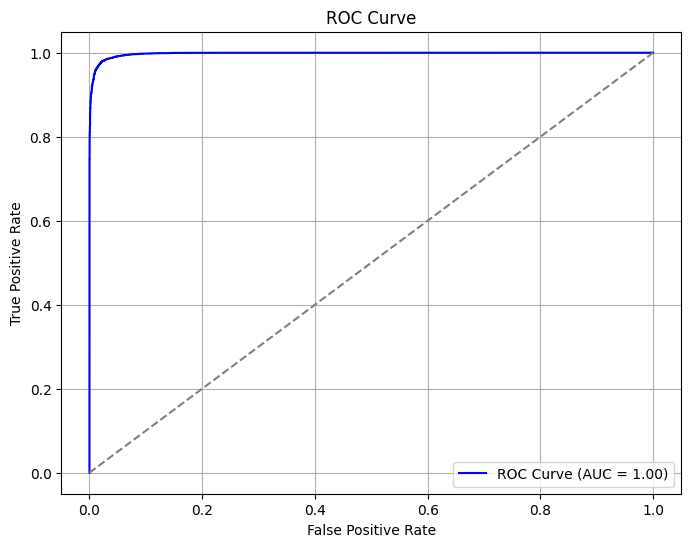

In [1290]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
y_probs = grid.predict_proba(X_test)[:,1]  # Probability of class 1 (win)
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, y_probs)
print("ROC AUC Score:", roc_auc)
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.grid()
plt.show()


In [1291]:
import pickle
pickle.dump(grid, open("ipl_win_predictor.pkl", "wb"))
